Full Name: Aparna Suresh

Username: asur0015@student.monash.edu

ID: 32263546



### 1.1.1 Create SparkSession<a class="anchor" id="1.1.1"></a>
[Back to top](#table)

**Write the code to get a SparkSession. For creating the SparkSession, you need to use a SparkConf object to configure the Spark app with a proper application name, to enable the maximum partition size not exceed 10MB, and to run locally with as many working processors as local cores on your machine**

In [1]:
# importing libraries from pyspark
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession

#creating spark configuration object
processing_cores = "local[*]"

application_name = "assignment2"

configuration = SparkConf().setMaster(processing_cores).setAppName(application_name).set("spark.sql.files.maxPartitionBytes", "10485760")

#creating the spark session
spark = SparkSession.builder.config(conf = configuration).getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

### 1.1.2 Define schemas<a class="anchor" id="1.1.1"></a>
[Back to top](#table)

**Write code to define the data schema for features, sales and stores datasets, following the data types suggested in the metadata file.**

In [2]:
#importing libraries
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [3]:
#defining schema for data -  features, sales, and stores
feature_schema = StructType() \
.add("Store", IntegerType(), True) \
.add("Date", DateType(), True) \
.add("Temperature", DoubleType(), True) \
.add("Fuel_Price", DoubleType(), True) \
.add("Markdown1", DoubleType(), True) \
.add("Markdown2", DoubleType(), True) \
.add("Markdown3", DoubleType(), True) \
.add("Markdown4", DoubleType(), True) \
.add("Markdown5", DoubleType(), True) \
.add("CPI", DoubleType(), True) \
.add("Unemployment", DoubleType(), True) \
.add("IsHoliday", BooleanType(), True) 

sales_schema = StructType() \
.add("Store", IntegerType(), True) \
.add("Dept", IntegerType(), True) \
.add("Date", DateType(), True) \
.add("Weekly_Sales", DoubleType(), True) \
.add("IsHoliday", BooleanType(), True)

stores_schema = StructType() \
.add("Store", IntegerType(), True) \
.add("Type", StringType(), True) \
.add("Size", IntegerType(), True) 

### 1.1.3 Load three DF<a class="anchor" id="1.1.1"></a>
[Back to top](#table)

**Using predefined schema, write code to load the features, sales and stores csv files into separate dataframes. Print the schemas for all of the dataframes**

In [4]:
#reading the input data files
features_df = spark.read.format("csv").option("header", True).options(delimiter = ',').schema(feature_schema).option("dateFormat", "dd/MM/yyyy").load("data/Features.csv")
sales_df = spark.read.format("csv").option("header", True).options(delimiter = ',').schema(sales_schema).option("dateFormat", "dd/MM/yyyy").load("data/sales.csv")
stores_df = spark.read.format("csv").option("header", True).options(delimiter = ',').schema(stores_schema).load("data/stores.csv")

In [5]:
#printing the schema for the data - features, sales, and stores
print("########## Features df ##########")
features_df.printSchema()

print("########## Sales df ##########")
sales_df.printSchema()

print("########## Stores df ##########")
stores_df.printSchema()

########## Features df ##########
root
 |-- Store: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Fuel_Price: double (nullable = true)
 |-- Markdown1: double (nullable = true)
 |-- Markdown2: double (nullable = true)
 |-- Markdown3: double (nullable = true)
 |-- Markdown4: double (nullable = true)
 |-- Markdown5: double (nullable = true)
 |-- CPI: double (nullable = true)
 |-- Unemployment: double (nullable = true)
 |-- IsHoliday: boolean (nullable = true)

########## Sales df ##########
root
 |-- Store: integer (nullable = true)
 |-- Dept: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Weekly_Sales: double (nullable = true)
 |-- IsHoliday: boolean (nullable = true)

########## Stores df ##########
root
 |-- Store: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Size: integer (nullable = true)



### 1.2.1 Exploring the data<a class="anchor" id="1.1.1"></a>
[Back to top](#table)

**Write code to show the total ‘null’ counts for each column in all of the three dataframes.**

In [6]:
from pyspark.sql.functions import isnan, when, count, col

#counting and printing the null values in each column of all the three dataframes
features_df.select(*(count(when(col(i).isNull(), i)).cast("string").alias(i) for i in features_df.columns)).show()
sales_df.select(*(count(when(col(i).isNull(), i)).cast("string").alias(i) for i in sales_df.columns)).show()
stores_df.select(*(count(when(col(i).isNull(), i)).cast("string").alias(i) for i in stores_df.columns)).show()

+-----+----+-----------+----------+---------+---------+---------+---------+---------+---+------------+---------+
|Store|Date|Temperature|Fuel_Price|Markdown1|Markdown2|Markdown3|Markdown4|Markdown5|CPI|Unemployment|IsHoliday|
+-----+----+-----------+----------+---------+---------+---------+---------+---------+---+------------+---------+
|    0|   0|          0|         0|     4158|     5269|     4577|     4726|     4140|585|         585|        0|
+-----+----+-----------+----------+---------+---------+---------+---------+---------+---+------------+---------+

+-----+----+----+------------+---------+
|Store|Dept|Date|Weekly_Sales|IsHoliday|
+-----+----+----+------------+---------+
|    0|   0|   0|           0|        0|
+-----+----+----+------------+---------+

+-----+----+----+
|Store|Type|Size|
+-----+----+----+
|    0|   0|   0|
+-----+----+----+



### 1.2.2 Write code to show the basic statistics (including count, mean, stddev, min, max, 25 percentile, 50 percentile, 75 percentile) for each numeric column. For each non-numeric feature in each dataframe, display the top-5 values and the corresponding counts, except for the columns of “Store,” “Dept," and "Date."


In [7]:
# basic statistics for the numerical values in the features dataframe
feature_numerical_columns = ["Store", "Temperature", "Fuel_Price", "Markdown1", "Markdown2", "Markdown3", "Markdown4", "Markdown5", "CPI", "Unemployment"]

# top 5 values and corresponding count of non-numerical values in features dataframe
feature_non_numerical_columns = [i for i in features_df.columns if i not in feature_numerical_columns]

#printing the basic statistics for the numerical columns in the features dataframe
print("Summary statistics for Numerical Columns")
features_df.select(feature_numerical_columns).summary().show()

#printing the top 5 values and their corresponding count for the non-numerical values in the features dataframe
print("For non-numerical columns")
for i in feature_non_numerical_columns:
    if(i not in ["Store", "Dept", "Date"]):
        print("Count For Column : " + i)
        features_df.select(i).groupBy(i).count().orderBy("count", ascending = False).show(5)

Summary statistics for Numerical Columns
+-------+---------------+-----------------+-------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+
|summary|          Store|      Temperature|         Fuel_Price|        Markdown1|        Markdown2|         Markdown3|        Markdown4|         Markdown5|               CPI|     Unemployment|
+-------+---------------+-----------------+-------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+-----------------+
|  count|           8190|             8190|               8190|             4032|             2921|              3613|             3464|              4050|              7605|             7605|
|   mean|           23.0|59.35619780219781| 3.4059918192918217|7032.371785714266|3384.176593632328|1760.1001799058915|3292.935886258671| 4132.216422222234|172.46080918276078|7.82682103879

In [8]:
# basic statistics for the numerical values in the sales dataframe
sales_numerical_columns = ["Store", "Dept", "Weekly_Sales"]

# top 5 values and corresponding count of non-numerical values in sales dataframe
sales_non_numerical_columns = [i for i in sales_df.columns if i not in sales_numerical_columns]

#printing the basic statistical summary for the numerical columns in the sales dataframe
print("Summary statistics for Numerical Columns")
sales_df.select(sales_numerical_columns).summary().show()

#printing the top 5 values and their corresponding count for the non-numerical values in the sales dataframe
print("For non-numerical columns")
for i in sales_non_numerical_columns:
    if(i not in ["Store", "Dept", "Date"]):
        print("Count For Column : " + i)
        sales_df.select(i).groupBy(i).count().orderBy("count", ascending = False).show(5)

Summary statistics for Numerical Columns
+-------+------------------+------------------+------------------+
|summary|             Store|              Dept|      Weekly_Sales|
+-------+------------------+------------------+------------------+
|  count|            421570|            421570|            421570|
|   mean|22.200545579619043| 44.26031738501317| 15981.25812346749|
| stddev|12.785297389902912|30.492054015785854|22711.183519163307|
|    min|                 1|                 1|          -4988.94|
|    25%|                11|                18|           2079.39|
|    50%|                22|                37|           7610.87|
|    75%|                33|                74|          20203.47|
|    max|                45|                99|         693099.36|
+-------+------------------+------------------+------------------+

For non-numerical columns
Count For Column : IsHoliday
+---------+------+
|IsHoliday| count|
+---------+------+
|    false|391909|
|     true| 29661|
+---

In [9]:
# basic statistics for the numerical values in the stores dataframe
stores_numerical_columns = ["Store", "Size"]

# top 5 values and corresponding count of non-numerical values in stores dataframe
stores_non_numerical_columns = [i for i in stores_df.columns if i not in stores_numerical_columns]

#printing the basic statistical summary for the numerical columns in the stores dataframe
print("Summary statistics for Numerical Columns")
stores_df.select(stores_numerical_columns).summary().show()

#printing the top 5 values and their corresponding count for the non-numerical values in the stores dataframe
print("For non-numerical columns")
for i in stores_non_numerical_columns:
    if(i not in ["Store", "Dept", "Date"]):
        print("Count For Column : " + i)
        stores_df.select(i).groupBy(i).count().orderBy("count", ascending = False).show(5)

Summary statistics for Numerical Columns
+-------+------------------+-----------------+
|summary|             Store|             Size|
+-------+------------------+-----------------+
|  count|                45|               45|
|   mean|              23.0|         130287.6|
| stddev|13.133925536563698|63825.27199115923|
|    min|                 1|            34875|
|    25%|                12|            70713|
|    50%|                23|           126512|
|    75%|                34|           202307|
|    max|                45|           219622|
+-------+------------------+-----------------+

For non-numerical columns
Count For Column : Type
+----+-----+
|Type|count|
+----+-----+
|   A|   22|
|   B|   17|
|   C|    6|
+----+-----+



### 1.2.3 Exploring the data<a class="anchor" id="1.1.1"></a>
[Back to top](#table)

**Write code to display a histogram to show the distribution of the weekly sales for stores with log-scale for the frequency axis. Describe what you observe from the plot**

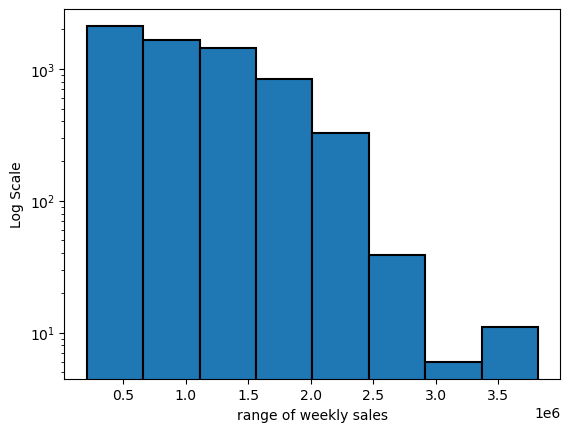

In [10]:
import matplotlib.pyplot as plt

#histogram to show the distribution of the weekly sales
plt.hist(sales_df.groupBy("Store", "Date", "IsHoliday").agg(sum("Weekly_Sales").alias("Weekly_Sales")).orderBy("Store", "Date").toPandas()["Weekly_Sales"], bins = 8, log = True, edgecolor = "#000000", linewidth = 1.5)
plt.xlabel("range of weekly sales")
plt.ylabel("Log Scale")
plt.show()


The histogram shows the weekly sales distribution. An ideal histogram displays equal distribution of data showing a bell curve shape. Not all histograms can project a bell- shaped curve distribution. If the shape tends to be towards the left or right or if the data is skewed, it represents disproportion in the distribution of the data. Here seeing the histogram above, it is a possibility that the data is not distributed evenly causing the skew in the histogram.   

### 1.2.3 Exploring the data<a class="anchor" id="1.1.1"></a>
[Back to top](#table)

**Apart from that, Draw a line-plot to show the trend of the average weekly sales of the month based on the different stores**

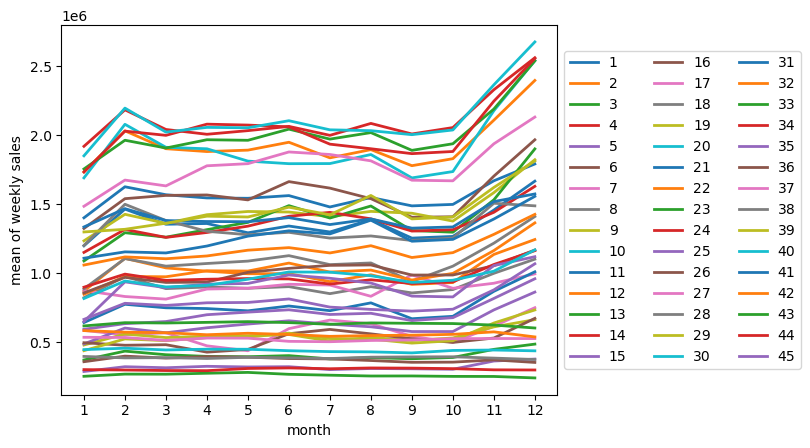

In [11]:
import pyspark.sql.functions as F

store_month_df = sales_df.groupBy("Store", "Date", "IsHoliday").agg(sum("Weekly_Sales").alias("Weekly_Sales")).groupBy("Store", F.month("Date").alias("month")).agg(mean("Weekly_Sales").alias("mean of weekly sales")).orderBy("Store", "month").toPandas()

fig,ax = plt.subplots()

for s in store_month_df["Store"].unique():
    ax.plot(store_month_df[store_month_df["Store"] == s]["month"], store_month_df[store_month_df["Store"] == s]["mean of weekly sales"], label = s, linewidth = 2)

ax.set_xlabel("month")
ax.set_ylabel("mean of weekly sales")
ax.set_xticks(store_month_df["month"].unique())
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 3)

### 1.2.4 Exploring the data<a class="anchor" id="1.1.1"></a>
[Back to top](#table)

**Explore the data provided and write code to present two plots totally worthy of presenting to the MelbourneGig company, describe your plots and discuss the findings from the plots**

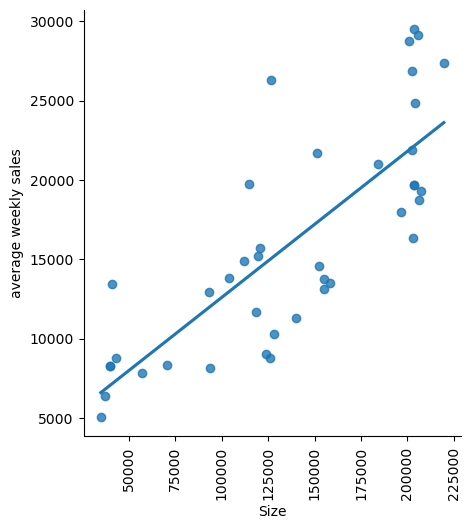

In [12]:
#scatterplot with trend line for depicting the trend between store size and weekly sales
import seaborn as sns
figure1 = sales_df.join(stores_df, ["Store"], "inner").groupBy("Size").agg(mean("Weekly_Sales").alias("average weekly sales")).toPandas()

sns.lmplot(x = "Size", y = "average weekly sales", data = figure1, ci = None)
plt.xticks(rotation = 90)
plt.show()

The above scatterplot shows the average weekly sales (on the Y axis) based on the size of the store (on the X axis). We can see that as the store size increases, the average weekly sales have also increased. A trend line has also been plotted to see the trend of the weekly sales based on the size. We can infer that, when the store size is big, there is a possibility that there is a wide range of availability of things in the store. This possibly might lead to larger sales in comparison with the stores of small size.  

In [13]:
#correlation plot for the joined dataframe based on all the given three dataframes - features, sales, stores
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

#joining the features with sales and then joining this joined dataframe with stores datframe
fss_joined_df = features_df.join(sales_df, ["Store", "Date", "IsHoliday"], "inner").join(stores_df, ["Store"], "inner")

#creating two new columns called year and month
#substituting the true false as 1 and 0 for isholiday column
fss_joined_df = fss_joined_df.withColumn("year" , F.year("Date")).withColumn("month" , F.month("Date")).withColumn("IsHoliday" , F.when(F.col("IsHoliday") , F.lit(1)).otherwise(0))
joined_df = fss_joined_df

input_cols = [i[0] for i in joined_df.dtypes if i[1] not in ["string", "date", "boolean"]]
joined_df = joined_df.select(input_cols)

#vector assembler to create vectors for the features from the joined dataframe
assembler = VectorAssembler(inputCols = input_cols, outputCol = "correlation").setHandleInvalid("skip")
joined_df = assembler.transform(joined_df).select("correlation")
joined_df = Correlation.corr(joined_df, "correlation").collect()[0][0].toArray().tolist() 

#correlation matrix for the joined dataframe
joined_df = spark.createDataFrame(data = joined_df)
joined_df = joined_df.toDF(*input_cols)
joined_df = joined_df.toPandas().set_axis(input_cols)
joined_df.style.background_gradient(cmap = 'coolwarm')


,Store,IsHoliday,Temperature,Fuel_Price,Markdown1,Markdown2,Markdown3,Markdown4,Markdown5,CPI,Unemployment,Dept,Weekly_Sales,Size,year,month
Store,1.000000,-0.005363,-0.153155,0.136718,0.006861,-0.019274,-0.018068,0.002050,0.060453,-0.213719,0.221854,0.008392,-0.053834,0.088596,0.007465,-0.017971
IsHoliday,-0.005363,1.000000,-0.153325,-0.136284,-0.062978,0.345704,0.423164,-0.017209,-0.076273,-0.001871,0.022496,0.002026,0.014389,-0.024260,-0.266867,0.197182
Temperature,-0.153155,-0.153325,1.000000,0.250824,0.019313,-0.332382,-0.088348,-0.057895,0.024329,0.201037,-0.009300,-0.001662,0.013029,0.078196,0.390732,0.171349
Fuel_Price,0.136718,-0.136284,0.250824,1.000000,0.084308,-0.243836,-0.093533,-0.025784,-0.137564,-0.365318,0.276568,-0.000743,-0.020557,0.005225,0.402771,-0.153685
Markdown1,0.006861,-0.062978,0.019313,0.084308,1.000000,-0.001615,-0.130754,0.828928,0.107125,-0.046005,0.064428,0.004395,0.037341,0.184665,0.185957,-0.176743
Markdown2,-0.019274,0.345704,-0.332382,-0.243836,-0.001615,1.000000,-0.051240,-0.017517,-0.023390,-0.036992,0.018334,0.001124,0.015829,0.081513,-0.226489,-0.012428
Markdown3,-0.018068,0.423164,-0.088348,-0.093533,-0.130754,-0.051240,1.000000,-0.080216,-0.043373,-0.025030,0.013967,0.003469,0.062792,0.035212,-0.327598,0.212150
Markdown4,0.002050,-0.017209,-0.057895,-0.025784,0.828928,-0.017517,-0.080216,1.000000,0.101114,-0.041662,0.018817,0.004650,0.029471,0.133569,0.166603,-0.208573
Markdown5,0.060453,-0.076273,0.024329,-0.137564,0.107125,-0.023390,-0.043373,0.101114,1.000000,0.076106,0.003336,0.004794,0.059649,0.210457,-0.114007,0.099218
CPI,-0.213719,-0.001871,0.201037,-0.365318,-0.046005,-0.036992,-0.025030,-0.041662,0.076106,1.000000,-0.291317,-0.006935,-0.016371,0.020084,0.018210,0.004455


Correlation matrix shows the correlation between all the features of the data. The red boxes forming the diagonal of the matrix represents the perfect correlation within the variable itself. From the above matrix, we can see that it is symmetrical with the same values forming a mirror representation from the either side of the diagonal. By default, it is a pearson correlation matrix. In pearson matrix, when the values tend to increase or decrease together, the correlation value is positive like shown in the above representation (mirror view). Wherever the values are positive, it  shows that the variables show the same characteristic and vice versa for the negative values. 


### 2.1.1 Discuss the feature selection and prepare the feature columns<a class="anchor" id="1.1.1"></a>
[Back to top](#table)

As we need to perform a one-step time-series prediction, meaning that the model’s prediction for the next weekly sales would be based on the previous weekly sales. The model will be used for future prediction Based on the data exploration from 1.2 and consider the situation we have, discuss which importances of those features (For example,which feature maybe useless and should be removed, which feature have a great impact to the label column,which features should be transformed) which features you are planning to use? Discuss the reasons for selecting them and how you create/transform them

In [14]:
#"Unemployment", "Size" are selected from continous type columns
from pyspark.ml.feature import UnivariateFeatureSelector
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

#performing feature selection using UnivariateFeatureSelector for continuous type columns in the combined dataframe
all_df = features_df.join(sales_df, ["Store", "Date"], "inner").join(stores_df, ["Store"], "inner")

#vector assembler for continuous features
assembler = VectorAssembler(inputCols = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "Size"], outputCol = "continous_features")
all_df = assembler.transform(all_df)

#setting threshold as 3 for getting 3 continuous features from the df
selector = UnivariateFeatureSelector(featuresCol = "continous_features", outputCol = "selected_continous_features", labelCol = "Weekly_Sales")
selector.setFeatureType("continuous").setLabelType("continuous").setSelectionThreshold(2)

all_df = selector.fit(all_df).transform(all_df)
all_df.select("continous_features", "selected_continous_features").show(2, truncate = False)

+----------------------------------------+---------------------------+
|continous_features                      |selected_continous_features|
+----------------------------------------+---------------------------+
|[42.31,2.572,211.0963582,8.106,151315.0]|[211.0963582,8.106]        |
|[38.51,2.548,211.2421698,8.106,151315.0]|[211.2421698,8.106]        |
+----------------------------------------+---------------------------+
only showing top 2 rows



Answer : Put in Documentation Part - Not here

### 2.1.2 Discuss the feature selection and prepare the feature columns<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
Write code to create the columns based on your discussion above

Use case 1: We need a model to predict stores which achieve the goals, which means the weekly sales of the store divide the Store size is greater than 8.5, create a column called "achieve_goal" and use 1 to label those achieved data, 0 for others’ data

Use case 2: Join the DataFrames for our one-step time-series weekly sales prediction for stores. You should make sure the weekly sales of the previous week and Store Type as the feature of our model. For other columns, you can choose based on your answer in 2.1.1

In [15]:
from pyspark.sql.window import Window as w

#data transformation and creating columns 
sales_df = sales_df.groupBy("Store", "Date", "IsHoliday").agg(sum("Weekly_Sales").alias("Weekly_Sales"))
ml_df = sales_df.join(stores_df, ["Store"], "inner").join(features_df.select("Store", "Date", "CPI", "Unemployment"), ["Store", "Date"], "inner")

ml_df = ml_df.withColumn("achieve_goal", F.when(F.col("Weekly_Sales")/F.col("Size") > 8.5, 1).otherwise(0))
ml_df = ml_df.withColumn("year" , F.year("Date")).withColumn("month" , F.month("Date")).withColumn("IsHoliday" , F.when(F.col("IsHoliday") , F.lit(1)).otherwise(0))
ml_df = ml_df.withColumn('Previous_Weekly_Sales', lag('Weekly_Sales')
                               .over(w.partitionBy("Store").orderBy(['Store', 'Date'])))

ml_df = ml_df.withColumn('Date', ml_df['Date'].cast(StringType()))
ml_df = ml_df.withColumnRenamed("Weekly_Sales", "target")
ml_df = ml_df.na.drop()
ml_df.show(5)

+-----+----------+---------+------------------+----+------+-----------+------------+------------+----+-----+---------------------+
|Store|      Date|IsHoliday|            target|Type|  Size|        CPI|Unemployment|achieve_goal|year|month|Previous_Weekly_Sales|
+-----+----------+---------+------------------+----+------+-----------+------------+------------+----+-----+---------------------+
|    1|2010-02-12|        1|1641957.4399999997|   A|151315|211.2421698|       8.106|           1|2010|    2|            1643690.9|
|    1|2010-02-19|        0|        1611968.17|   A|151315|211.2891429|       8.106|           1|2010|    2|   1641957.4399999997|
|    1|2010-02-26|        0|1409727.5900000003|   A|151315|211.3196429|       8.106|           1|2010|    2|           1611968.17|
|    1|2010-03-05|        0|        1554806.68|   A|151315|211.3501429|       8.106|           1|2010|    3|   1409727.5900000003|
|    1|2010-03-12|        0|1439541.5900000005|   A|151315|211.3806429|       8.106

### 2.2.1 Preparing Spark ML Transformers/Estimators for features, labels and models<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
Write code to create Transformers/Estimators for transforming/assembling the columns you selected above in 2.1, and create ML model Estimators for Decision Tree and Gradient Boosted Tree model for each use case

In [16]:
#defining features based on their type
output_column = "achieve_goal"
non_numerical_columns =  ["Type"]
numerical_categorical_columns = ['Store', 'IsHoliday', 'year', 'month']
numerical_continous_columns = ["target", "Previous_Weekly_Sales", "Size", "Unemployment"]

#printing the features
print("non_numerical_columns: " + str(non_numerical_columns))
print("numerical_categorical_columns: " + str(numerical_categorical_columns))
print("numerical_continous_columns: " + str(numerical_continous_columns))
print("output_column: " + str(output_column))

non_numerical_columns: ['Type']
numerical_categorical_columns: ['Store', 'IsHoliday', 'year', 'month']
numerical_continous_columns: ['target', 'Previous_Weekly_Sales', 'Size', 'Unemployment']
output_column: achieve_goal


In [17]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import GBTClassifier

##USE CASE 1
#indexer, encoder, and assembler definition for decision tree and GBT classifiers
input_indexer_columns = non_numerical_columns + numerical_categorical_columns
output_indexer_columns = [i + "_index_col" for i in input_indexer_columns]
indexer1 = StringIndexer(inputCols = input_indexer_columns, outputCols = output_indexer_columns)

input_ohe_columns = [i for i in indexer1.getOutputCols()]
output_ohe_columns = [i + "_ohe_col" for i in indexer1.getOutputCols()]
encoder1 = OneHotEncoder(inputCols = input_ohe_columns, outputCols = output_ohe_columns)

assembler1 = VectorAssembler(inputCols = output_ohe_columns + ['target', 'Size'], outputCol = "features")

#classifiers
dtc = DecisionTreeClassifier(featuresCol = "features", labelCol = "achieve_goal", predictionCol = "prediction", maxDepth = 10, maxBins = 40)
gbc = GBTClassifier(featuresCol = "features", labelCol = "achieve_goal", predictionCol = "prediction", maxDepth = 10, maxIter = 20, maxBins = 40)

In [18]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.regression import GBTRegressor

##USE CASE 2
#indexer, encoder and assembler definition for decision tree regressor and GBT regressor
input_indexer_columns = [i for i in non_numerical_columns + ["Store"]]
output_indexer_columns = [i + "_index_col" for i in input_indexer_columns]
indexer2 = StringIndexer(inputCols = input_indexer_columns, outputCols = output_indexer_columns)

input_ohe_columns = indexer2.getOutputCols()
output_ohe_columns = [i + "_ohe_col" for i in input_ohe_columns]
encoder2 = OneHotEncoder(inputCols = input_ohe_columns, outputCols = output_ohe_columns)

assembler2 = VectorAssembler(inputCols = output_ohe_columns + ["Previous_Weekly_Sales", "Size"], outputCol = "features")

#regression models
dtr = DecisionTreeRegressor(featuresCol = "features", labelCol = "target", maxDepth = 10, maxBins = 40)
gbr = GBTRegressor(featuresCol = "features", labelCol = "target", maxDepth = 10, maxIter = 20, maxBins = 40)

### 2.2.2 Preparing Spark ML Transformers/Estimators for features, labels and models<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
Write code to include the above Transformers/Estimators into pipelines

In [19]:
from pyspark.ml import Pipeline

#pipeline 1 and 2 for usecase 1 - classifiers
pipeline1 = Pipeline(stages = [indexer1, encoder1, assembler1, dtc])
pipeline2 = Pipeline(stages = [indexer1, encoder1, assembler1, gbc])

#pipeline 3 and 4 for usecase 2 - regressions
pipeline3 = Pipeline(stages = [indexer2, encoder2, assembler2, dtr])
pipeline4 = Pipeline(stages = [indexer2, encoder2, assembler2, gbr])

### 2.3.1 Preparing the training data and testing data<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
Write code to split the data for training and testing purpose - use the data in 2010 and 2012 for training purpose and the half data in 2011 year for training and others as testing purpose; then cache the training and testing data

In [20]:
#training and testing the data
#splitting 2011 data into halves for training and testing
train, test = ml_df.filter(ml_df.year  == 2011).randomSplit(weights = [0.5, 0.5], seed = 42)

# training data - 2010 and 2012 and unionizing with the training half of 2011 
train = train.union(ml_df.filter((ml_df.year  == 2010)|(ml_df.year  == 2012)))

#cache the training and testing data
train.cache()
test.cache()

DataFrame[Store: int, Date: string, IsHoliday: int, target: double, Type: string, Size: int, CPI: double, Unemployment: double, achieve_goal: int, year: int, month: int, Previous_Weekly_Sales: double]

### 2.4.1 Training and evaluating models<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
For use case 1, write code to use the corresponding ML Pipelines to train the models on the training data from 2.3. And then use the trained models to perform predictions on the testing data from 2.3

In [21]:
#predictions for usecase-1 using DT Classifier
dtc_model = pipeline1.fit(train)
dtc_predictions = dtc_model.transform(test)

#printing predictions for decision tree classifier
dtc_predictions.select("achieve_goal", "prediction").show(5)

+------------+----------+
|achieve_goal|prediction|
+------------+----------+
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
+------------+----------+
only showing top 5 rows



In [22]:
#predictions for usecase-1 using GBT classifier
gbc_model = pipeline2.fit(train)
gbc_predictions = gbc_model.transform(test)

#printing predictions for the gradient boosted tree classifier
gbc_predictions.select("achieve_goal", "prediction").show(5)

+------------+----------+
|achieve_goal|prediction|
+------------+----------+
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
+------------+----------+
only showing top 5 rows



### 2.4.2 Training and evaluating models<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
For both models’ results in use case 1, write code to display the count of each combination of above-threshold/below-threshold label and prediction label in formats like the screenshot below. Compute the AUC, accuracy, recall and precision for the above-threshold/below-threshold label from each model testing result using pyspark MLlib/ML APIs

In [23]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

dtc_results = dtc_predictions.groupBy("achieve_goal", "prediction").count().orderBy("prediction", "achieve_goal")
dtc_results.show()

#calculating AUC, accuracy, weighted precision, weighted recall, and f1 score for the decision tree classifier
dtc_AUC = BinaryClassificationEvaluator(rawPredictionCol = "prediction", labelCol = "achieve_goal", metricName="areaUnderROC").evaluate(dtc_predictions)
accuracy = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "achieve_goal", metricName = "accuracy").evaluate(dtc_predictions)
recall = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "achieve_goal", metricName = "weightedRecall").evaluate(dtc_predictions)
precision = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "achieve_goal", metricName = "weightedPrecision").evaluate(dtc_predictions)
f1 = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "achieve_goal", metricName = "f1").evaluate(dtc_predictions)

print("AUC:", str(dtc_AUC), " accuracy:", str(accuracy), " recall:", str(recall), " precision:", str(precision), " f1:", str(f1))


+------------+----------+-----+
|achieve_goal|prediction|count|
+------------+----------+-----+
|           0|       0.0|  656|
|           1|       0.0|   11|
|           0|       1.0|   13|
|           1|       1.0|  512|
+------------+----------+-----+

AUC: 0.9797677535890158  accuracy: 0.9798657718120806  recall: 0.9798657718120805  precision: 0.9798796479037566  f1: 0.9798699133317974


In [24]:
gbc_results = gbc_predictions.groupBy("achieve_goal", "prediction").count().orderBy("prediction", "achieve_goal")
gbc_results.show()

#calculating AUC, accuracy, weighted precision, weighted recall, and f1 score for the GBT classifier
gbc_AUC = BinaryClassificationEvaluator(rawPredictionCol = "prediction", labelCol = "achieve_goal", metricName="areaUnderROC").evaluate(gbc_predictions)
accuracy = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "achieve_goal", metricName = "accuracy").evaluate(gbc_predictions)
recall = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "achieve_goal", metricName = "weightedRecall").evaluate(gbc_predictions)
precision = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "achieve_goal", metricName = "weightedPrecision").evaluate(gbc_predictions)
f1 = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "achieve_goal", metricName = "f1").evaluate(gbc_predictions)

print("AUC:", str(gbc_AUC), " accuracy:", str(accuracy), " recall:", str(recall), " precision:", str(precision), " f1:", str(f1))



+------------+----------+-----+
|achieve_goal|prediction|count|
+------------+----------+-----+
|           0|       0.0|  654|
|           1|       0.0|    9|
|           0|       1.0|   15|
|           1|       1.0|  514|
+------------+----------+-----+

AUC: 0.9801850311672056  accuracy: 0.9798657718120806  recall: 0.9798657718120805  precision: 0.979940171444078  f1: 0.9798778414518328


### 2.4.2 Training and evaluating models<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
Draw a ROC plot for any model you want

/opt/conda/lib/python3.8/site-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


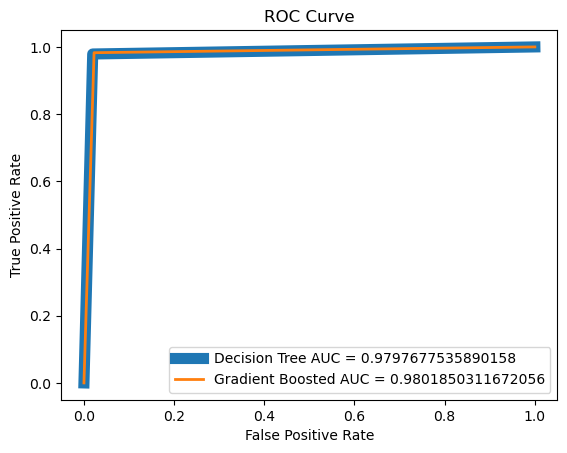

In [25]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

class Metrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(Metrics, self).__init__(*args)

    def plot_list(self, scalardd):
        plot_points = []
        [plot_points := plot_points + [(float(row._1()), float(row._2()))] for row in scalardd.collect()]
        return plot_points

    def plot_curve(self, method):
        return self.plot_list(getattr(self._java_model, method)().toJavaRDD())


dtc_preds = dtc_predictions.select("achieve_goal","prediction").rdd.map(lambda row: (row["prediction"], float(row["achieve_goal"])))
dtc_points = Metrics(dtc_preds).plot_curve('roc')
plt.plot([i[0] for i in dtc_points], [i[1] for i in dtc_points], label = "Decision Tree AUC = " + str(dtc_AUC), linewidth = 8)

gbc_preds = gbc_predictions.select("achieve_goal","prediction").rdd.map(lambda row: (row["prediction"], float(row["achieve_goal"])))
gbc_points = Metrics(gbc_preds).plot_curve('roc')
plt.plot([i[0] for i in gbc_points], [i[1] for i in gbc_points], label = "Gradient Boosted AUC = " + str(gbc_AUC), linewidth = 2)

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### 2.4.2 Training and evaluating models<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
Discuss which is the better model

Discussion In the Document Part 

### 2.4.3 Training and evaluating models<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
For use case 2, write code to use the corresponding ML Pipelines to train the models on the cache training data from 2.3. And then use the trained models to perform predictions on the testing data from 2.3

In [26]:
#for usecase 2, printing predictions for deciion tree regressor model
dtr_model = pipeline3.fit(train)
dtr_predictions = dtr_model.transform(test)
dtr_predictions.select("target", "prediction").show(5)

+------------------+------------------+
|            target|        prediction|
+------------------+------------------+
|        1311986.87|1211892.3811111113|
|1350730.3099999998| 1374912.622978142|
|        1344167.13| 1374912.622978142|
|1254955.6800000002| 1374912.622978142|
|        1443206.46|1307592.9535384616|
+------------------+------------------+
only showing top 5 rows



In [27]:
#for usecase 2, printing predictions for GBT regressor model
gbr_model = pipeline4.fit(train)
gbr_predictions = gbr_model.transform(test)
gbr_predictions.select("target", "prediction").show(5)

+------------------+------------------+
|            target|        prediction|
+------------------+------------------+
|        1311986.87|1210249.6484519907|
|1350730.3099999998|1356484.6079912293|
|        1344167.13|1372852.8566112362|
|1254955.6800000002|1372852.8566112362|
|        1443206.46| 1310569.400061113|
+------------------+------------------+
only showing top 5 rows



### 2.4.4 Evaluate regression models<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
Persist the better model you selected

In [28]:
from pyspark.ml.evaluation import RegressionEvaluator

#rmse and r squared score for decision tree regression model
rmse_score = RegressionEvaluator(metricName = 'rmse', predictionCol = 'prediction', labelCol = 'target').evaluate(dtr_predictions)
rsquared_score = RegressionEvaluator(metricName = 'r2', predictionCol = 'prediction', labelCol = 'target').evaluate(dtr_predictions)
print("For Model Decision Tree: RMSE score:", str(rmse_score), "R-squared score:", str(rsquared_score))

#rmse and r squared score for GBT regression model
rmse_score = RegressionEvaluator(metricName = 'rmse', predictionCol = 'prediction', labelCol = 'target').evaluate(gbr_predictions)
rsquared_score = RegressionEvaluator(metricName = 'r2', predictionCol = 'prediction', labelCol = 'target').evaluate(gbr_predictions)
print("For Model Gradient Boosted: RMSE score:", str(rmse_score), "R-squared score:", str(rsquared_score))

For Model Decision Tree: RMSE score: 157270.89796347 R-squared score: 0.9250918443665753
For Model Gradient Boosted: RMSE score: 156023.9576128173 R-squared score: 0.9262749712254943


In [29]:
#persisting the Gradient boosted regressor pipeline model
gbr_model.stages[-1].write().overwrite().save('asur0015')

### 2.4.5 Evaluate regression models<a class="anchor" id="1.1.1"></a>
[Back to top](#table)
Write code to print out the features with each corresponding feature importance for the GBT model, ranked the result based on feature importance.

In [30]:
import pandas as pd

#printing the features with corresponding importance of the GBT model
feature_importance = gbr_model.stages[-1].featureImportances
prediction_attributes = gbr_predictions.schema["features"].metadata["ml_attr"]["attrs"]

data = []
[data := data + prediction_attributes[i] for i in prediction_attributes]
score_df = pd.DataFrame(data)
score_df["feature importance"] = score_df["idx"].apply(lambda x: feature_importance[x])
score_df.sort_values("feature importance", ascending = False, inplace = True)
score_df

,idx,name,feature importance
0,46,Previous_Weekly_Sales,0.927563
1,47,Size,0.010244
22,20,Store_index_col_ohe_col_1,0.009006
6,4,Store_index_col_ohe_col_19,0.007154
34,32,Store_index_col_ohe_col_27,0.004789
15,13,Store_index_col_ohe_col_23,0.004386
27,25,Store_index_col_ohe_col_41,0.004342
20,18,Store_index_col_ohe_col_39,0.003502
36,34,Store_index_col_ohe_col_45,0.002908
17,15,Store_index_col_ohe_col_18,0.002707


### 3.1 Knowledge sharing
How many jobs are observed when training the KMeans clustering model following the code below? Provide a screenshot from Spark UI for running a simple KMeans model training from the provided data

In [31]:
from pyspark.ml.clustering import KMeans

customer_df = spark.createDataFrame( [
[0, 35.3, 37.5], [1, 41.4, -23.5], [2, 28.3, -13.3], [3, 09.5, -9.0],
[4, 62.8, -18.23], [5, 63.8, -18.33], [6, 82.8, -17.23], [7, 52.8, -13.43], 
[8, 72.8, 48.23], [9, 65.8, 15.43], [10, 42.8, -13.23],
], ["ID", "Att_1", "Att_2"])
assembler = VectorAssembler(inputCols=["Att_1", "Att_2"], outputCol="features") 
kmeans = KMeans(k=2).fit(assembler.transform(customer_df))


### 3.2 Explaining Kmeans
Combining the parallelism theory from lecture, Spark source code, and the Spark UI, discuss which parallelism of the kmeans algorithm in spark is more likely to belong to, data parallelism or result parallelism?
- 300 words max for the discussion
- Hint - you can also refer to the Spark source code on github https://github.com/apache/spark/blob/master/mllib/src/main/scala/org/apache/spark/mllib/clustering/KMeans.scala


Answer: In the documentation

**References:**

 (2022) Binaryclassificationmetrics (spark 3.3.1 javadoc). Available at: https://spark.apache.org/docs/latest/api/java/org/apache/spark/mllib/evaluation/BinaryClassificationMetrics.html (Accessed: January 30, 2023). 
 
Brownlee, J. (2020) How to calculate feature importance with python, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/calculate-feature-importance-with-python/ (Accessed: January 30, 2023). 

Feature importance (no date) Sparkitecture. Available at: https://www.sparkitecture.io/machine-learning/feature-importance (Accessed: January 30, 2023). 

Naveen (2020) PySpark Structtype &amp; Structfield explained with examples, Spark By {Examples}. Available at: https://sparkbyexamples.com/pyspark/pyspark-structtype-and-structfield/ (Accessed: January 30, 2023). 

Raman, V. (2021) Time-series forecasting using SPARK ML: Part - 2, Medium. Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/time-series-forecasting-using-spark-ml-part-2-31506514c643 (Accessed: January 30, 2023). 

Regressionevaluator¶ (no date) RegressionEvaluator - PySpark 3.3.1 documentation. Available at: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.evaluation.RegressionEvaluator.html#pyspark.ml.evaluation.RegressionEvaluator.metricName (Accessed: January 30, 2023). 

seth127seth127                    2 et al. (1965) Pyspark extract ROC curve?, Stack Overflow. Available at: https://stackoverflow.com/questions/52847408/pyspark-extract-roc-curve (Accessed: January 30, 2023). 

Source code for pyspark.mllib.common (no date) pyspark.mllib.common - PySpark 3.3.1 documentation. Available at: https://spark.apache.org/docs/latest/api/python/_modules/pyspark/mllib/common.html (Accessed: January 30, 2023). 

Timothy Lin (2021) Feature selection using feature importance score - creating a PySpark estimator, Quasilinear Musings. Timothy Lin. Available at: https://www.timlrx.com/blog/feature-selection-using-feature-importance-score-creating-a-pyspark-estimator (Accessed: January 30, 2023). 

user3847447user3847447                    1 et al. (1961) How to plot ROC curve in python, Stack Overflow. Available at: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python (Accessed: January 30, 2023). 